<a href="https://colab.research.google.com/github/GPAPD/ML/blob/main/suplement-price%20-predictor%5Csuplement_price_prodictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supplement Sales Revenue

This modle will help user to optimize the item price and prodect their revenue acording to the price

all data right reserved from : https://www.kaggle.com/datasets/zahidmughal2343/supplement-sales-data/data?select=Supplement_Sales_Weekly_Expanded.csv

##Data prepraparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
df = pd.read_csv("Dataset/Supplement_Sales_Weekly_Expanded.csv")


In [3]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [4]:
#drop and duplicates rows#
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [5]:
print(df.isna().sum())

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64


In [6]:
#check df titles and types#
print(df.columns)
print(df.dtypes)

Index(['Date', 'Product Name', 'Category', 'Units Sold', 'Price', 'Revenue',
       'Discount', 'Units Returned', 'Location', 'Platform'],
      dtype='object')
Date               object
Product Name       object
Category           object
Units Sold          int64
Price             float64
Revenue           float64
Discount          float64
Units Returned      int64
Location           object
Platform           object
dtype: object


## Analysing

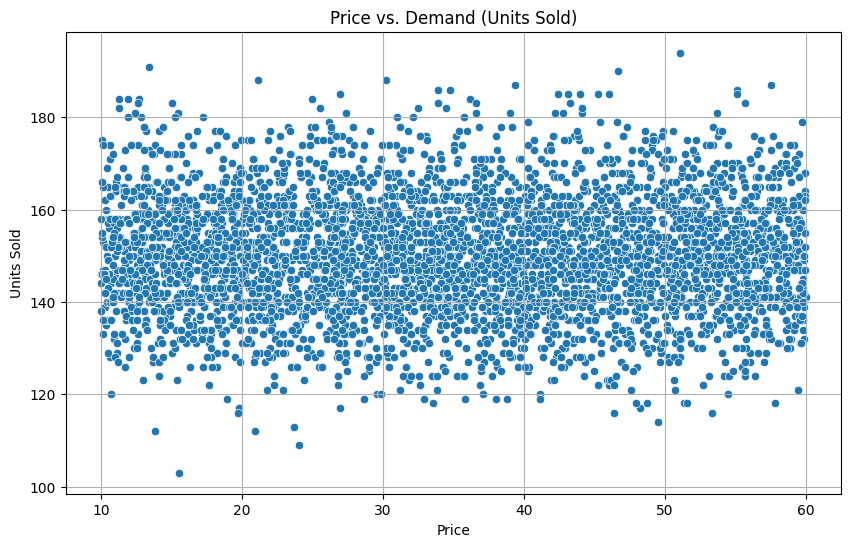

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price', y='Units Sold', data=df)
plt.title('Price vs. Demand (Units Sold)')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

In [8]:
correlation = df['Price'].corr(df['Units Sold'])
print(f"Correlation between Price and Demand: {correlation:.2f}")

Correlation between Price and Demand: 0.01


In [9]:
#check the uniqe result count
df['Category'].nunique()

10

In [10]:
#get the uniqe
print(df['Category'].unique())

['Protein' 'Vitamin' 'Omega' 'Performance' 'Amino Acid' 'Mineral' 'Herbal'
 'Sleep Aid' 'Fat Burner' 'Hydration']


In [11]:
# Convert Month to numeric
df["New_Cat"] = df["Category"].map({
    "Protein": 1, "Vitamin": 2, "Omega": 3, "Performance": 4,
    "Amino Acid": 5, "Mineral": 6, "Herbal": 7, "Sleep Aid": 8,
    "Fat Burner": 9, "Hydration": 10
})


In [12]:
# One-hot encode 'Category' and add to features
pd.concat([df["Category"], pd.get_dummies(df['Category'], prefix='Category')], axis=1)

,Category,Category_Amino Acid,Category_Fat Burner,Category_Herbal,Category_Hydration,Category_Mineral,Category_Omega,Category_Performance,Category_Protein,Category_Sleep Aid,Category_Vitamin
0,Protein,False,False,False,False,False,False,False,True,False,False
1,Vitamin,False,False,False,False,False,False,False,False,False,True
2,Omega,False,False,False,False,False,True,False,False,False,False
3,Vitamin,False,False,False,False,False,False,False,False,False,True
4,Performance,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4379,Sleep Aid,False,False,False,False,False,False,False,False,True,False
4380,Vitamin,False,False,False,False,False,False,False,False,False,True
4381,Fat Burner,False,True,False,False,False,False,False,False,False,False
4382,Mineral,False,False,False,False,True,False,False,False,False,False


In [13]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,New_Cat
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,1
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,2
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,3
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,2
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,4


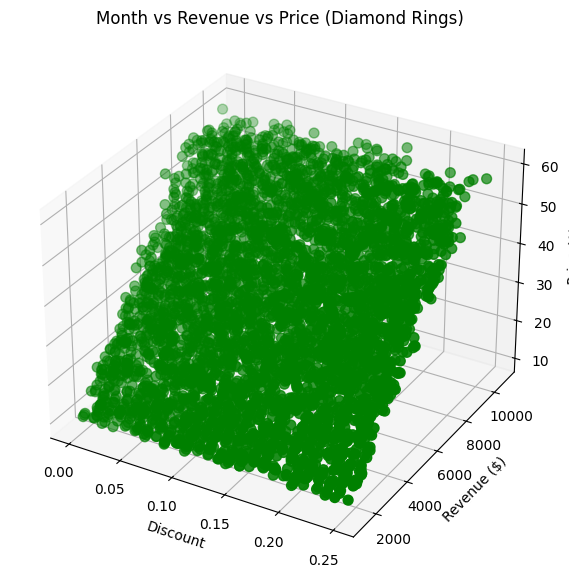

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Discount'], df['Revenue'], df['Price'], c='green', s=50)
ax.set_xlabel('Discount')
ax.set_ylabel('Revenue ($)')
ax.set_zlabel('Price ($)')
plt.title('Month vs Revenue vs Price (Diamond Rings)')
plt.show()

## Model Training

In [15]:
X = df[['Price', 'Discount', 'Category']]
y = df['Revenue']

In [16]:
#Handling Categorical Data with One-Hot Encoding
X = pd.get_dummies(X, columns=['Category'])

In [17]:
new_df= X

In [18]:
X = new_df[[
    'Price', 'Discount', 'Category_Amino Acid',
    'Category_Fat Burner', 'Category_Herbal', 'Category_Hydration', 'Category_Mineral',
    'Category_Omega', 'Category_Performance', 'Category_Protein', 'Category_Sleep Aid',
    'Category_Vitamin'
]]
y = df['Revenue']

In [19]:
new_df.head()

,Price,Discount,Category_Amino Acid,Category_Fat Burner,Category_Herbal,Category_Hydration,Category_Mineral,Category_Omega,Category_Performance,Category_Protein,Category_Sleep Aid,Category_Vitamin
0,31.98,0.03,False,False,False,False,False,False,False,True,False,False
1,42.51,0.04,False,False,False,False,False,False,False,False,False,True
2,12.91,0.25,False,False,False,False,False,True,False,False,False,False
3,16.07,0.08,False,False,False,False,False,False,False,False,False,True
4,35.47,0.25,False,False,False,False,False,False,True,False,False,False


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation
evaluating the both
1. R² (coefficient of determination)
2. MSE (Mean Squared Error)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MSE: 218270.64
R²: 0.95


In [33]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred2 = model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 252629.39
R²: 0.95


1. R² (coefficient of determination) this test shows both models fit the data well.
2. MSE (Mean Squared Error) average squared difference between predicted and actual values. Lower is better.

**Short conclusion**

Best model here: RandomForestRegressor
because it has a lower MSE with the same R², meaning it predicts more accurately on average.

In [37]:
import numpy as np

# Example: for one data point (need to be careful with one-hot columns!)
sample = np.array([19.00, 5, 0,0,0,0,0,1,0,0,0,0])  # price, units sold, discount, units returned, category dummy columns...
sample = sample.reshape(1, -1)


In [38]:
predicted_revenue = model.predict(sample)

print(f"Predicted Revenue: ${predicted_revenue[0]:.2f}")

Predicted Revenue: $2126.04


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
predicted_revenue2 = model2.predict(sample)

print(f"Predicted Revenue: ${predicted_revenue2[0]:.2f}")


Predicted Revenue: $2804.67


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [42]:
sample = pd.DataFrame(
    [[39, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
    columns=[
        'Price', 'Discount', 'Category_Amino Acid',
        'Category_Fat Burner', 'Category_Herbal', 'Category_Hydration', 'Category_Mineral',
        'Category_Omega', 'Category_Performance', 'Category_Protein', 'Category_Sleep Aid',
        'Category_Vitamin'
    ])

predicted_revenue = model.predict(sample)
print(f"Predicted Revenue: ${predicted_revenue[0]:.2f}")

Predicted Revenue: $5130.85


In [43]:
sample2 = pd.DataFrame(
    [[39, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
    columns=[
        'Price', 'Discount', 'Category_Amino Acid',
        'Category_Fat Burner', 'Category_Herbal', 'Category_Hydration', 'Category_Mineral',
        'Category_Omega', 'Category_Performance', 'Category_Protein', 'Category_Sleep Aid',
        'Category_Vitamin'
    ])

predicted_revenue2 = model2.predict(sample2)
print(f"Predicted Revenue: ${predicted_revenue2[0]:.2f}")

Predicted Revenue: $5860.85


## Exporting model data

In [45]:
import joblib

# Save the model to a file
joblib.dump(model2, 'model/supplemet_revenue_predictor.pkl')

['model/supplemet_revenue_predictor.pkl']

In [1]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

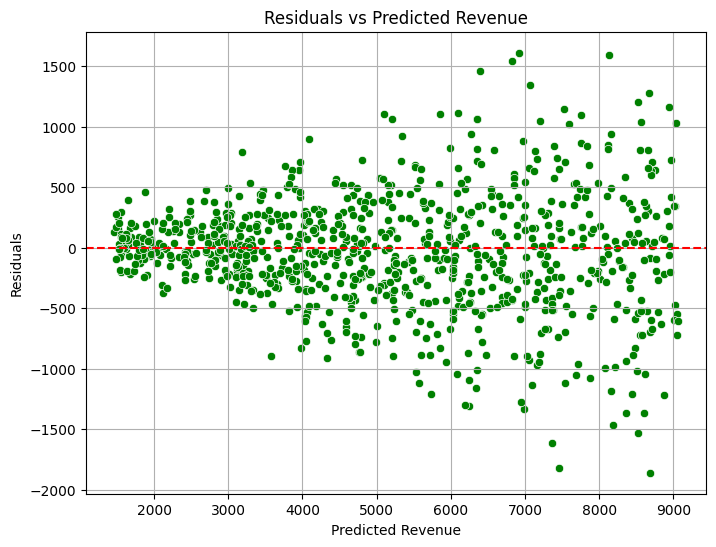

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Revenue')
plt.grid(True)
plt.show()
